In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3682,ham,When did i use soc... I use it only at home......,NaN,NaN,NaN
2112,spam,You are a winner you have been specially selec...,NaN,NaN,NaN
4259,ham,Are you plans with your family set in stone ?,NaN,NaN,NaN
1438,ham,"Arms fine, how's Cardiff and uni?",NaN,NaN,NaN
5416,ham,My slave! I want you to take 2 or 3 pictures o...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Here we can see that there are many null values in the last three columns that need to be dropped

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [7]:
df.sample(5)

,v1,v2
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."
74,ham,U can call me now...
3943,ham,"Until 545 lor... Ya, can go 4 dinner together..."
2278,ham,Hmm...Bad news...Hype park plaza $700 studio t...
4417,ham,"When you get free, call me"


Renaming the columns now

In [8]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5546,ham,Ic. There are a lotta childporn cars then.
4992,ham,\HEY KATE
1034,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
818,ham,Then why you not responding
4054,ham,When is school starting. Where will you stay. ...


Applying LabelEncoding for Ham and Spam here

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

Now 0 = Ham and 1 = Spam

In [11]:
df.sample(5)

,target,text
4554,0,7 wonders in My WORLD 7th You 6th Ur style 5th...
2794,0,How will I creep on you now? ;_;
3652,0,It has issues right now. Ill fix for her by to...
4556,0,I am in hospital da. . I will return home in e...
1290,0,Eat jap done oso aft ur lect wat... ÌÏ got lec...


Checking for missing values

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

Checking for duplicate values and dropping them if present

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

### EDA

Checking the number of spam and ham messages

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e93c9ee6d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

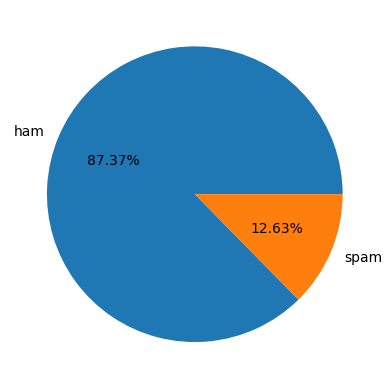

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.2f%%')

Counting the number of characters, words and sentences in each sms

In [19]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kunj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#number of characters in each text
df['num_characters'] = df['text'].apply(len)

In [21]:
#number of words in each text
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
#number of sentences in each text
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
#ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

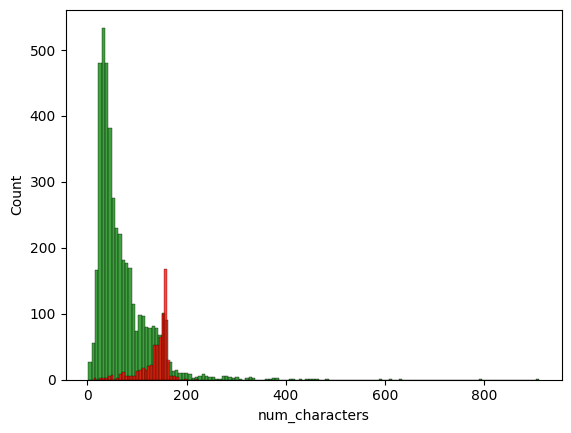

In [27]:
sns.histplot(df[df['target'] == 0]['num_characters'], color='green', label='ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='spam')

<Axes: xlabel='num_words', ylabel='Count'>

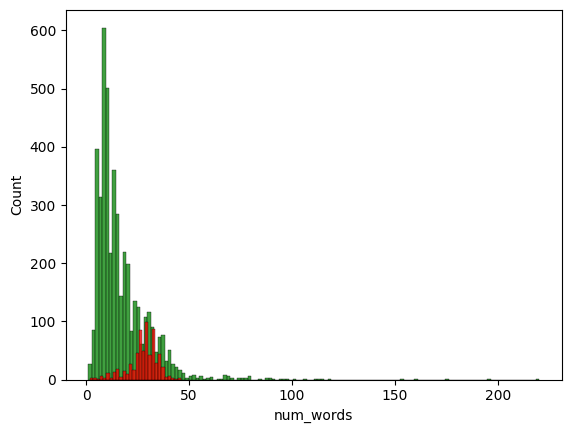

In [28]:
sns.histplot(df[df['target'] == 0]['num_words'], color='green', label='ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='spam')

<Axes: xlabel='num_sentences', ylabel='Count'>

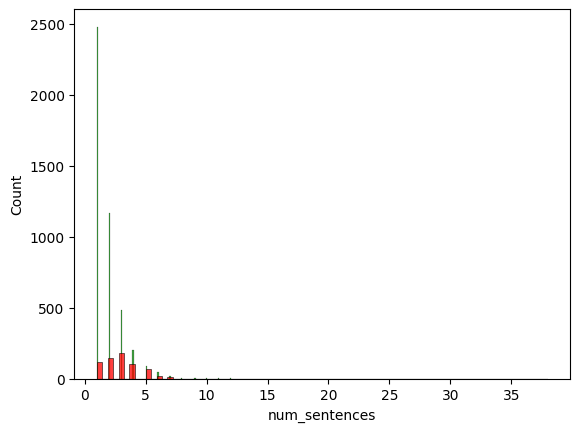

In [29]:
sns.histplot(df[df['target'] == 0]['num_sentences'], color='green', label='ham')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red', label='spam')

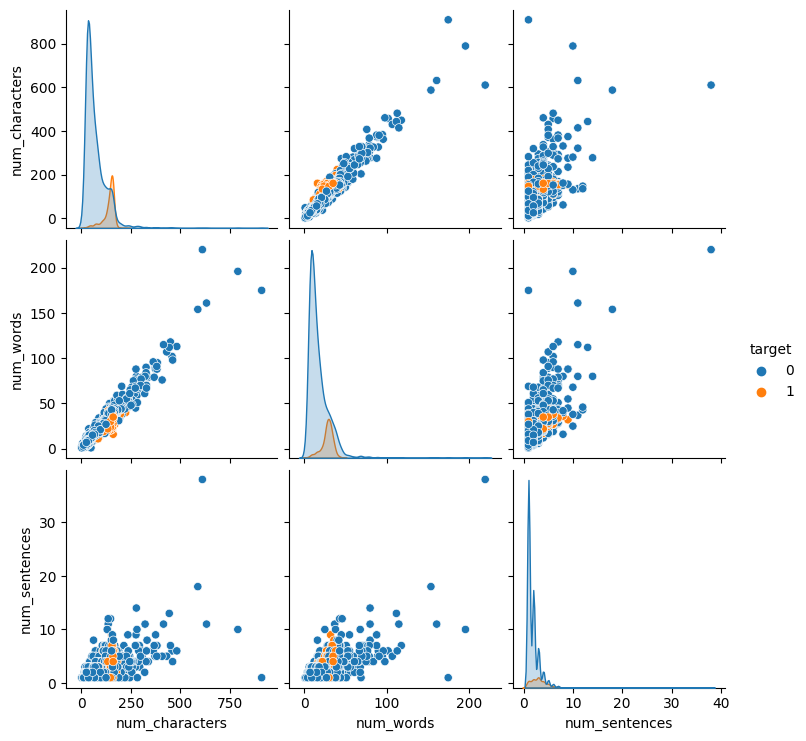

In [30]:
sns.pairplot(df, hue='target')

C:\Users\Kunj\AppData\Local\Temp\ipykernel_19984\2337223748.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

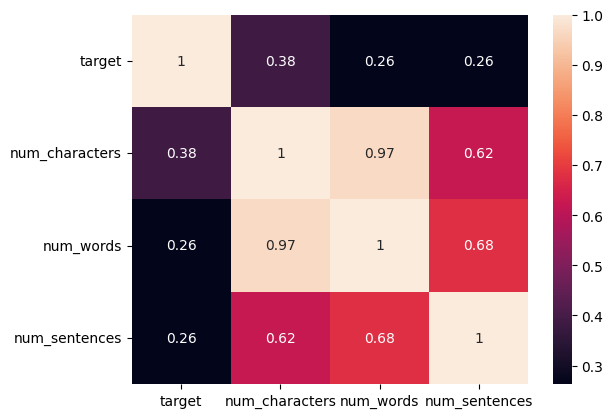

In [31]:
sns.heatmap(df.corr(), annot=True) 

## Data Preprocessing

<ul>Lower case<br>
Tokenization<br>
Removing special characters<br>
Removing stop words and punctuation<br>
Stemming</ul>

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kunj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if word not in nltk.corpus.stopwords.words('english')]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)   
    return text

In [35]:
df['text'] = df['text'].apply(transform_text)

In [36]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri wkli comp win fa cup final tkt may ...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [39]:
%pip install wordcloud


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/151.4 kB ? eta -:--:--
     -------                               30.7/151.4 kB 660.6 kB/s eta 0:00:01
     ----------                            41.0/151.4 kB 393.8 kB/s eta 0:00:01
     ----------------------                92.2/151.4 kB 655.4 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 595.3 kB/s eta 0:00:01
     ----------------------------------   143.4/151.4 kB 655.8 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 564.8 kB/s eta 0:00:00


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['text'].str.cat(sep=' '))

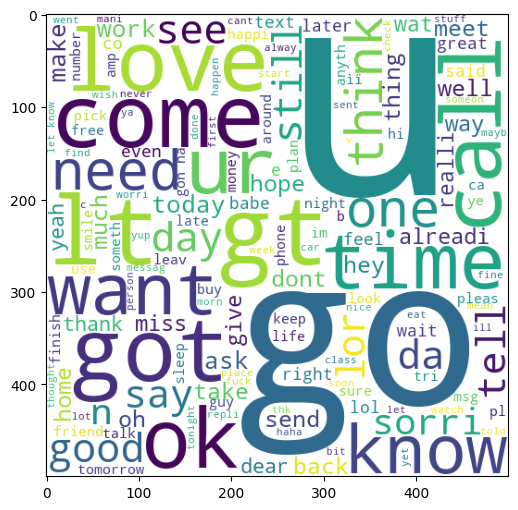

In [46]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)

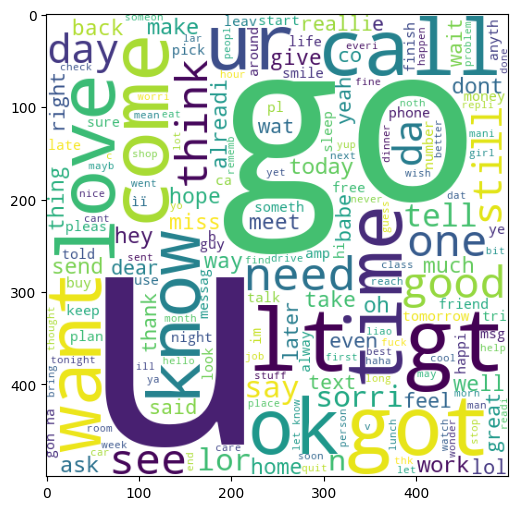

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['text'].str.cat(sep=' '))
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for text in df[df['target'] == 1]['text']:
    for word in text.split():
        spam_corpus.append(word)

ham_corpus = []
for text in df[df['target'] == 0]['text']:
    for word in text.split():
        ham_corpus.append(word)

In [49]:
from collections import Counter
spam_counter = Counter(spam_corpus)
ham_counter = Counter(ham_corpus)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, 'txt'),
  Text(3, 0, 'text'),
  Text(4, 0, 'u'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'mobil'),
  Text(7, 0, 'stop'),
  Text(8, 0, 'repli'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'prize'),
  Text(11, 0, 'get'),
  Text(12, 0, 'new'),
  Text(13, 0, 'servic'),
  Text(14, 0, 'tone'),
  Text(15, 0, 'send'),
  Text(16, 0, 'urgent'),
  Text(17, 0, 'nokia'),
  Text(18, 0, 'contact'),
  Text(19, 0, 'award'),
  Text(20, 0, 'phone'),
  Text(21, 0, 'cash'),
  Text(22, 0, 'pleas'),
  Text(23, 0, 'week'),
  Text(24, 0, 'win'),
  Text(25, 0, 'c'),
  Text(26, 0, 'collect'),
  Text(27, 0, 'min'),
  Text(28, 0, 'custom'),
  Text(29, 0, 'messag')])

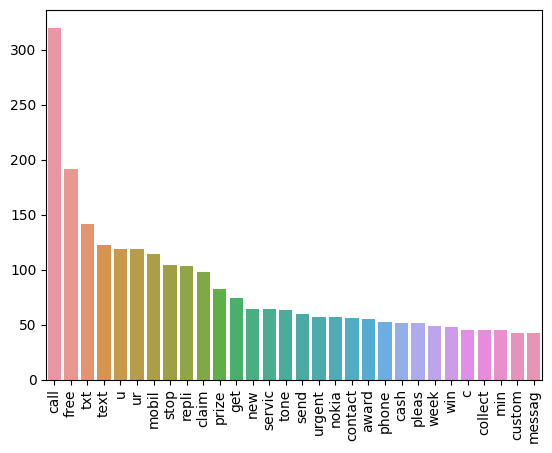

In [55]:
sns.barplot(x=[i[0] for i in spam_counter.most_common(30)], y=[i[1] for i in spam_counter.most_common(30)])
plt.xticks(rotation=90)

In [52]:
ham_counter.most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, 'come'),
  Text(6, 0, 'got'),
  Text(7, 0, 'know'),
  Text(8, 0, 'like'),
  Text(9, 0, 'call'),
  Text(10, 0, 'time'),
  Text(11, 0, 'ok'),
  Text(12, 0, 'love'),
  Text(13, 0, 'good'),
  Text(14, 0, 'want'),
  Text(15, 0, 'ur'),
  Text(16, 0, 'day'),
  Text(17, 0, 'need'),
  Text(18, 0, 'one'),
  Text(19, 0, 'lor'),
  Text(20, 0, 'home'),
  Text(21, 0, 'think'),
  Text(22, 0, 'see'),
  Text(23, 0, 'take'),
  Text(24, 0, 'still'),
  Text(25, 0, 'da'),
  Text(26, 0, 'tell'),
  Text(27, 0, 'make'),
  Text(28, 0, 'say'),
  Text(29, 0, 'back')])

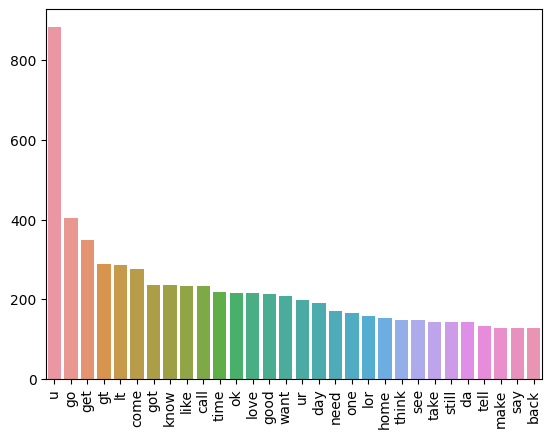

In [56]:
sns.barplot(x=[i[0] for i in ham_counter.most_common(30)], y=[i[1] for i in ham_counter.most_common(30)])
plt.xticks(rotation=90)

## Model Building

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [85]:
X = tfidf.fit_transform(df['text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
print(X.shape)
print(y.shape)

(5169, 3000)
(5169,)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [89]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [90]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print('GaussianNB Accuracy: ', accuracy_score(y_test, y_pred_gnb))
print('GaussianNB Precision: ', precision_score(y_test, y_pred_gnb))
print('GaussianNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred_gnb))

GaussianNB Accuracy:  0.8549323017408124
GaussianNB Precision:  0.45739910313901344
GaussianNB Confusion Matrix: 
 [[782 121]
 [ 29 102]]


In [91]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test, y_pred_mnb))
print('MultinomialNB Precision: ', precision_score(y_test, y_pred_mnb))
print('MultinomialNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred_mnb))

MultinomialNB Accuracy:  0.9709864603481625
MultinomialNB Precision:  0.9809523809523809
MultinomialNB Confusion Matrix: 
 [[901   2]
 [ 28 103]]


In [92]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print('BernoulliNB Accuracy: ', accuracy_score(y_test, y_pred_bnb))
print('BernoulliNB Precision: ', precision_score(y_test, y_pred_bnb))
print('BernoulliNB Confusion Matrix: \n', confusion_matrix(y_test, y_pred_bnb))

BernoulliNB Accuracy:  0.9816247582205029
BernoulliNB Precision:  0.9827586206896551
BernoulliNB Confusion Matrix: 
 [[901   2]
 [ 17 114]]


## Pipelining

In [93]:
import pickle

In [94]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))